## Exercise 4.2 
Collect the birthdays of the students in your class, sort them, and compute the interarrival times in days. Plot the CDF of the interarrival times and the CCDF on a log-y scale. 

Does it look like an exponential distribution?


## Solution:
For similicity, I'll generate the required births myself in light of the range of values in the data mentioned in Ex. 4.1

In [44]:
using DataFrames
using Requests
using PyPlot

In [2]:
data = [("Timeofbirth",1,8,Int), ("childsex",9,16,Int),("Birthweight",17,24,Int), ("Numberofminutesaftermidnight",25,32,Int)]

4-element Array{Tuple{String,Int64,Int64,DataType},1}:
 ("Timeofbirth",1,8,Int64)                   
 ("childsex",9,16,Int64)                     
 ("Birthweight",17,24,Int64)                 
 ("Numberofminutesaftermidnight",25,32,Int64)

In [4]:
df_=DataFrame()

""


In [5]:
map(x->df_[Symbol(x[1])]=Vector{x[4]}(0),data)

4-element Array{Array{Int64,1},1}:
 Int64[]
 Int64[]
 Int64[]
 Int64[]

In [6]:
res = get("http://thinkstats.com/babyboom.dat")

Response(200 OK, 11 headers, 3674 bytes in body)

In [8]:
read_file = readlines(IOBuffer(res.data));

In [11]:
colums_ = read_file[end-43:end]  

44-element Array{String,1}:
 "    0005       1    3837       5\n"
 "    0104       1    3334      64\n"
 "    0118       2    3554      78\n"
 "    0155       2    3838     115\n"
 "    0257       2    3625     177\n"
 "    0405       1    2208     245\n"
 "    0407       1    1745     247\n"
 "    0422       2    2846     262\n"
 "    0431       2    3166     271\n"
 "    0708       2    3520     428\n"
 "    0735       2    3380     455\n"
 "    0812       2    3294     492\n"
 "    0814       1    2576     494\n"
 ⋮                                   
 "    1909       2    4162    1149\n"
 "    1947       2    3630    1187\n"
 "    1949       2    3406    1189\n"
 "    1951       2    3402    1191\n"
 "    2010       1    3500    1210\n"
 "    2037       2    3736    1237\n"
 "    2051       2    3370    1251\n"
 "    2104       2    2121    1264\n"
 "    2123       2    3150    1283\n"
 "    2217       1    3866    1337\n"
 "    2327       1    3542    1407\n"
 "    2355       1    

In [12]:
for l in colums_
        if length(l)>10
            for (i,case) in enumerate(data)
                val2push=
                try 
                    parse(case[4],l[case[2]:case[3]])
                catch 
                    NA
                end
                push!(df_[Symbol(case[1])],val2push)
          end
      end
    end

In [13]:
df_

,Timeofbirth,childsex,Birthweight,Numberofminutesaftermidnight
1,5,1,3837,5
2,104,1,3334,64
3,118,2,3554,78
4,155,2,3838,115
5,257,2,3625,177
6,405,1,2208,245
7,407,1,1745,247
8,422,2,2846,262
9,431,2,3166,271
10,708,2,3520,428


In [16]:
maximum(df_[:,1]), minimum(df_[:,1])

(2355,5)

In [30]:
class_birth_time = rand(minimum(df_[:,1]): maximum(df_[:,1]),60)

60-element Array{Int64,1}:
 1047
 1693
  116
 2145
 1332
 1603
 2079
 1968
  359
 1443
 1597
 2248
  573
    ⋮
 1629
  511
  767
  568
 1625
   26
  109
 1371
  804
 1407
 1641
 1585

In [32]:
sorted_class_birth_time = sort(class_birth_time)

60-element Array{Int64,1}:
   26
  109
  116
  134
  266
  359
  362
  380
  455
  467
  470
  472
  511
    ⋮
 1968
 1984
 2079
 2097
 2145
 2176
 2201
 2248
 2251
 2318
 2329
 2345

In [33]:
## interarrival 

interarrival = Int[]

for i = 1:length(sorted_class_birth_time)-1
    push!(interarrival, (sorted_class_birth_time[i+1, 1] - sorted_class_birth_time[i, 1]))
end


In [34]:
interarrival

59-element Array{Int64,1}:
  83
   7
  18
 132
  93
   3
  18
  75
  12
   3
   2
  39
  57
   ⋮
 102
  16
  95
  18
  48
  31
  25
  47
   3
  67
  11
  16

note that there is no pattern in the interarrival time values !

In [35]:
c = countmap(interarrival)

Dict{Int64,Int64} with 43 entries:
  2   => 2
  11  => 1
  39  => 2
  46  => 1
  197 => 1
  25  => 1
  29  => 1
  8   => 1
  95  => 1
  57  => 1
  90  => 1
  14  => 1
  31  => 1
  112 => 1
  106 => 1
  52  => 1
  18  => 3
  26  => 1
  83  => 1
  49  => 1
  4   => 2
  67  => 2
  93  => 1
  1   => 2
  30  => 1
  ⋮   => ⋮

In [36]:
## calc cdf
function calc_cdf(c) # c is a data dict
    runsum = 0
    xs = Float64[]
    cs = Float64[]
   
    for (value, count) in sort(c)
        runsum = runsum + count
        push!(xs, value)
        push!(cs, runsum)
    end

    total = float(runsum)  # total = 1596
    cdf = [c/total for c in cs]   ## cdf[end] = 1, ps carrried cdf
    
    return xs, cdf
end

calc_cdf (generic function with 1 method)

In [37]:
xs, cdf = calc_cdf(c)

([1.0,2.0,3.0,4.0,6.0,7.0,8.0,10.0,11.0,12.0  …  83.0,90.0,91.0,93.0,95.0,102.0,106.0,112.0,132.0,197.0],[0.0338983,0.0677966,0.135593,0.169492,0.186441,0.237288,0.254237,0.271186,0.288136,0.338983  …  0.847458,0.864407,0.881356,0.898305,0.915254,0.932203,0.949153,0.966102,0.983051,1.0])

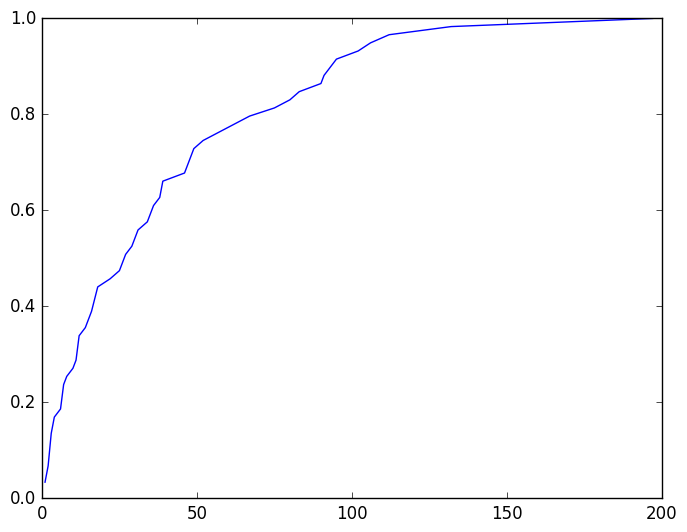

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fba800532d0>

In [46]:
plot(xs, cdf)
# xlabel!("Minutes")
# ylabel!("CDF")

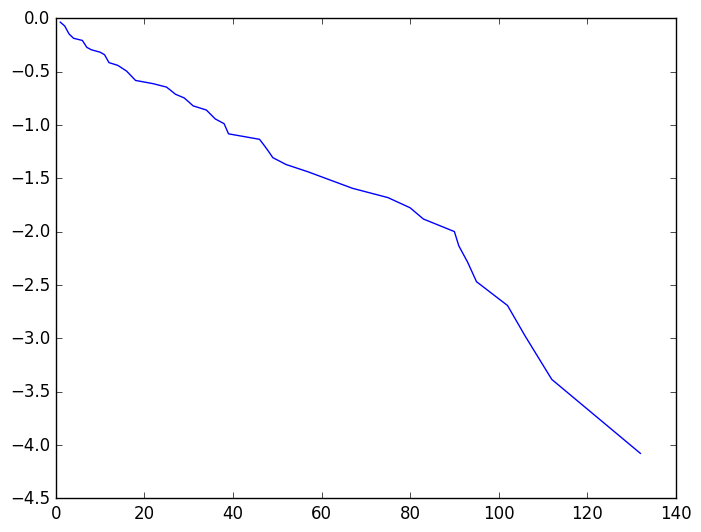

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fba7ad86850>

In [80]:
plot(xs, log(1-cdf))
# xlabel!("Minutes")
# ylabel!("CCDF")

## Error!

Note that there is a mistake in plotting log-y as it is expected to be 10^n where n varies from 0 to -inf ! .. 

However, it is still valid that the plot is not looks like an exponential dictribution cuase we have small number of data points ! 